In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, roc_curve, precision_score, roc_auc_score, f1_score
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("data/mushrooms.csv")
df.shape

(8124, 23)

In [8]:
df.head().T

,0,1,2,3,4
class,1,0,0,1,0
cap-shape,5,5,0,5,5
cap-surface,2,2,2,3,2
cap-color,4,9,8,8,3
bruises,1,1,1,1,0
odor,6,0,3,6,5
gill-attachment,1,1,1,1,1
gill-spacing,0,0,0,0,1
gill-size,1,0,0,1,0
gill-color,4,4,5,5,4


In [9]:
# X = df.drop(["class"], axis=1)
# y = df["class"]
# X = pd.get_dummies(X)
# X.head()

In [10]:
labelencoder=LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [11]:
X = df.drop(["class"], axis=1)
y = df["class"]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=6)

clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print("Accuracy: "+ str(clf.score(X_test,y_test)))
print("Recall: " + str(round(recall_score(y_test, y_pred),3)))
print("Precision: " + str(round(precision_score(y_test,  y_pred),3)))
print("F1-measure: " + str(round(f1_score(y_test,  y_pred),3)))

confusion_matrix(y_test,y_pred)

Accuracy: 0.9464615384615385
Recall: 0.927
Precision: 0.96
F1-measure: 0.943


array([[818,  30],
       [ 57, 720]], dtype=int64)

___
# Method - Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[848,   0],
       [  0, 777]], dtype=int64)

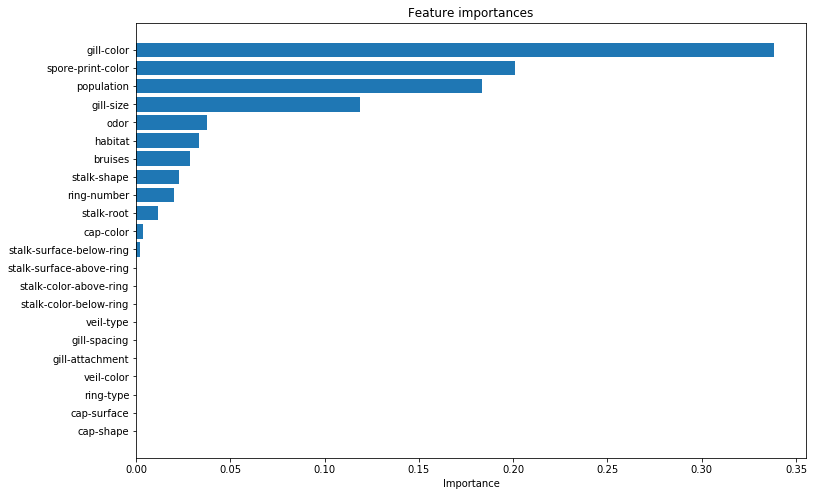

In [35]:
features_list = X.columns.values
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(12,8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()

___
# Method - chi2_statics

In [ ]:
use_features = chi2_result.sort_values(by='chi2_statics', ascending=False)['features'].head(5).values

print('top 5 most useful features are:')
for f in use_features:
    print(f)

Text(0.5,1,'Classification - TOP20 features (importance)')

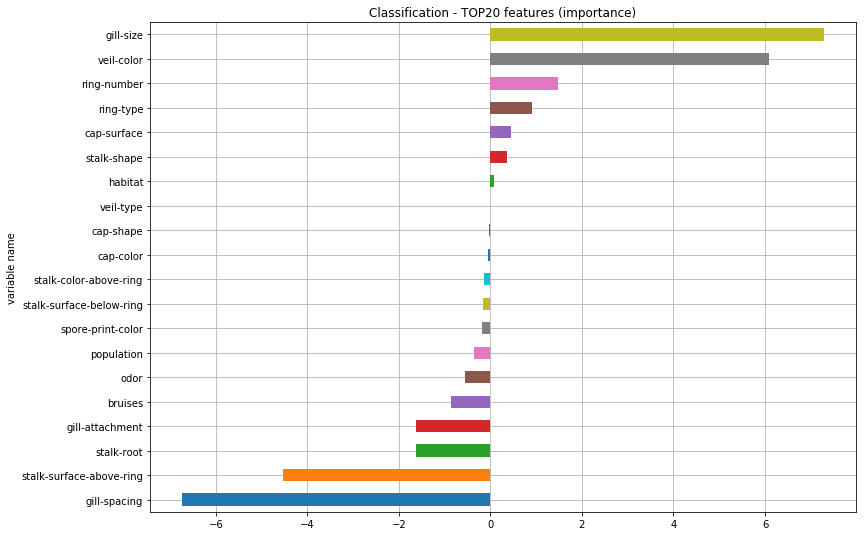

In [23]:
values = clf.coef_[0]
names = X_train.columns

importance = pd.DataFrame({"value": values, "name": names}).sort_values("value")
importance = importance.set_index("name")

# TOP20 FACTORS
top20 = pd.concat([importance["value"].head(10),importance["value"].tail(10)])

fig, ax = plt.subplots(figsize=(14,8), gridspec_kw={"top": 0.90, "bottom":0.05, "left":0.2})

top20.plot.barh(ax=ax)

plt.rcParams['axes.axisbelow'] = True
plt.ylabel("variable name")
plt.grid(True)
plt.title("Classification - TOP20 features (importance)")

In [16]:
importance

,value
name,
gill-spacing,-6.732338
stalk-surface-above-ring,-4.534481
stalk-root,-1.627720
gill-attachment,-1.617016
bruises,-0.868566
odor,-0.556636
population,-0.358122
spore-print-color,-0.183863
stalk-surface-below-ring,-0.160025


___
# Method - chi2_statics

                    features  chi2_statics       p_values
0                 gill-color   5957.764469   0.000000e+00
1                  ring-type   1950.610146   0.000000e+00
2                  gill-size   1636.606833   0.000000e+00
3                    bruises   1194.277352  1.069037e-261
4                 stalk-root   1186.029221  6.630617e-260
5               gill-spacing    826.795274  8.061293e-182
6                    habitat    751.309489  2.082916e-165
7          spore-print-color    379.132729   1.922119e-84
8                 population    311.766736   9.002366e-70
9   stalk-surface-above-ring    222.982400   2.022392e-50
10               cap-surface    214.068544   1.779362e-48
11  stalk-surface-below-ring    206.648180   7.398869e-47
12    stalk-color-above-ring    119.792216   7.024638e-28
13    stalk-color-below-ring    109.789410   1.089740e-25
14                      odor     75.910163   2.968682e-18
15               stalk-shape     36.594105   1.454709e-09
16            

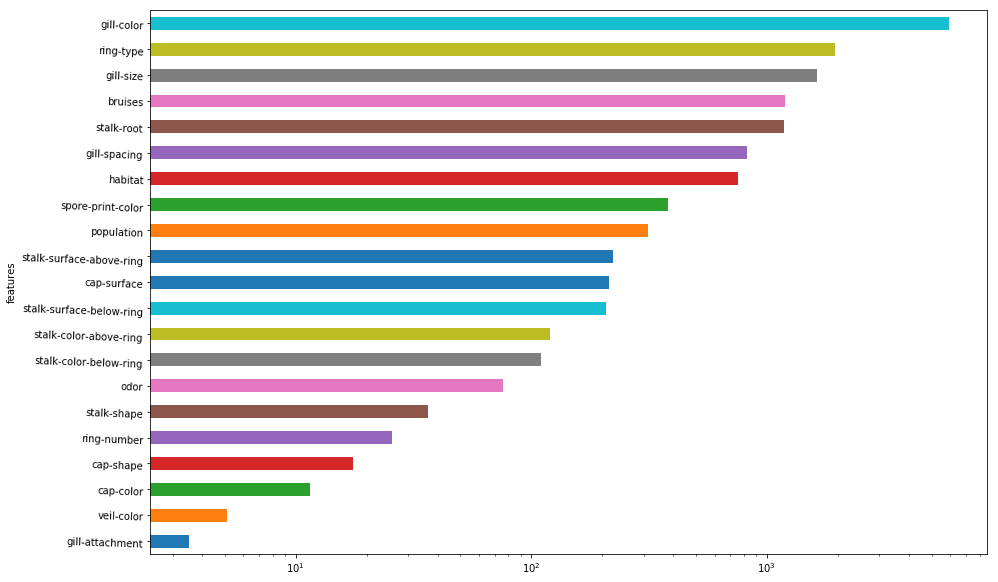

In [25]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import LabelEncoder

feature_columns = df.columns[1:]

fig = plt.figure(figsize = (15,10))

le = LabelEncoder()
numeric_data = pd.DataFrame()
for f in feature_columns:
    numeric_data[f] = le.fit_transform(df[f])
    
chi_statics, p_values = chi2(numeric_data, df['class'])

chi2_result = pd.DataFrame({'features': feature_columns, 'chi2_statics': chi_statics, 'p_values': p_values})
chi2_result.dropna(axis=0, how='any', inplace=True)

print(chi2_result.sort_values(by='chi2_statics', ascending=False)[['features', 'chi2_statics', 'p_values']].reset_index().drop('index', axis=1))

_ = chi2_result.sort_values(by='chi2_statics', ascending=True).set_index('features')['chi2_statics'].plot(kind='barh', logx=True, rot=-2)

In [21]:
use_features = chi2_result.sort_values(by='chi2_statics', ascending=False)['features'].head(5).values

print('top 5 most useful features are:')
for f in use_features:
    print(f)

top 5 most useful features are:
gill-color
ring-type
gill-size
bruises
stalk-root


___ 
# Method - Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

# X = df.drop(["class"], axis=1)
# y = df["class"]

# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=6)

clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print("Accuracy: "+ str(clf.score(X_test,y_test)))
print("Recall: " + str(round(recall_score(y_test, y_pred),3)))
print("Precision: " + str(round(precision_score(y_test,  y_pred),3)))
print("F1-measure: " + str(round(f1_score(y_test,  y_pred),3)))

print('Training Score: %.2f%%' % (rfc.score(X_train, y_train) * 100))
print('Test Score: %.2f%%' % (rfc.score(X_test, y_test) * 100))

confusion_matrix(y_test,y_pred)

Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1-measure: 1.0


array([[848,   0],
       [  0, 777]], dtype=int64)

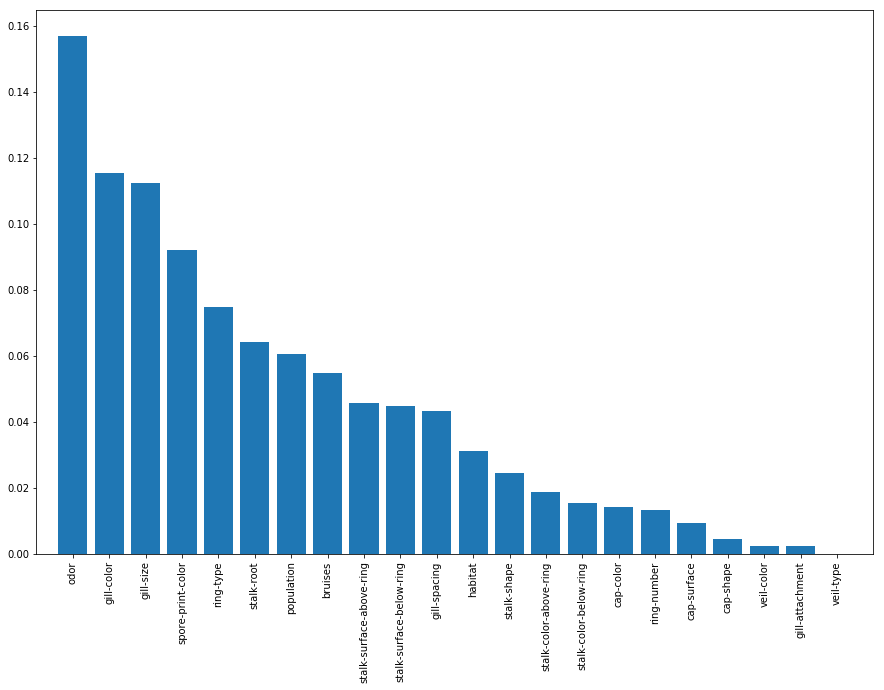

In [30]:
importances = clf.feature_importances_
features = df.columns[1:]
sort_indices = np.argsort(importances)[::-1]
sorted_features = []
for idx in sort_indices:
    sorted_features.append(features[idx])

plt.figure(figsize = (15,10))

plt.bar(range(len(importances)), importances[sort_indices], align='center');
plt.xticks(range(len(importances)), sorted_features, rotation='vertical');
plt.xlim([-1, len(importances)])
plt.grid(False)